# Capstone Project - The Battle of the Neighborhoods (Week 2)


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

The Analysis is aimed at helping people looking to relocate to a new city(for better standard of living) along with their family.There are many factors that need to be taken into account for family looking to settle in a new city:

* Environmental conditions
* Availability of Standard Schools, Colleges, Hospitals etc near by
* Cost of real estate/ Rent
* Traffic conditions

It becomes a very cumbersome task for someone to find an appropriate location to settle down keeping in mind the above constraints. For the purpose of illustration i am focussing on the city of Mumbai(India) which is the financial capital of the country.
Thousands of people come to this city every year for better professional prospects.

This analysis will enable an individual/family to identify an optimal neighbourhood location to settle down with his family.


## Data <a name="data"></a>

## Below are the data sources while would be utilised for the analysis:


* Mumbai Postcode data would be sourced from the website :https://mumbai7.com/postal-codes-in-mumbai/. 

* Geospatial data for Mumbai Postcodes is imported into a CSV file from http://www.geonames.org/export/zip/IN.zip ZIP file.

* Mumbai Real Estate buy/ Rental rates  fetched from https://www.kaggle.com/jedipro/flats-for-rent-in-mumbai/data



The Mumbai Postcode data can be joined with the Geospatial data to plot the various locations on the Mumbai map. This data can be then combined with the Real Estate/Rental data to narrow down the areas which are affordable for living.

The Foursquare API can be leveraged for information regarding Hospitals,Schools, Colleges, Mall, Parks to identify the most suitable location.

All the above information would assist an individual/family to make an informed decision in an effective and time efficient manner.






In [1]:
# Importing the Mumbai Pincode data through Web scraping

import urllib.request
# specify which URL/web page we are going to be scraping
url = "https://mumbai7.com/postal-codes-in-mumbai/"

# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")



In [2]:
# Assigning the Table details to variable "right_table"

all_tables=soup.find_all("table")

right_table=soup.find('table')

#right_table


In [3]:
# Loading the Column Data into Lists

A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        
#Import the Data into dataframe  

import pandas as pd
df_Pincode=pd.DataFrame(A,columns=['City'])
df_Pincode['PostOffice']=B
df_Pincode['Pincode']=C

#Convert Datatype of "Pincode" column to int32
df_Pincode["Pincode"] =df_Pincode["Pincode"].astype(int)

df_Pincode.head()


,City,PostOffice,Pincode
0,Mumbai,August Kranti Marg,400036
1,Mumbai,Aarey Milk Colony,400065
2,Mumbai,Andheri (East),400069
3,Mumbai,Andheri (West),400058
4,Mumbai,Antop Hill,400037


In [4]:
# Structure of the Pincode Dataframe
df_Pincode.shape


(157, 3)

In [5]:
#Importing Geospatial Data from CSV file

df_geo=pd.read_csv('C:\\Users\\Aditya Dixit\\Desktop\\PincodeGeoData.csv')
df_geo.rename(columns={"Postcode":"Pincode"}, inplace=True)
df_geo.head()

,Pincode,Area,State,City,SubArea,Latitude,Longitude
0,744101,Marine Jetty,Andaman & Nicobar Islands,South Andaman,Portblair,11.6667,92.7500
1,744101,Port Blair,Andaman & Nicobar Islands,South Andaman,Port Blair,11.6667,92.7500
2,744101,N.S.Building,Andaman & Nicobar Islands,South Andaman,Portblair,11.6667,92.7500
3,744102,Haddo,Andaman & Nicobar Islands,South Andaman,Port Blair,11.6833,92.7167
4,744102,Chatham,Andaman & Nicobar Islands,South Andaman,Portblair,11.7000,92.6667


In [6]:
# Combining the df_Pincode and df_geo to obtain Longitude and Latitude values

df_Pincode_Geo = pd.merge(df_Pincode, df_geo, on='Pincode', how='inner')
df_Pincode_Geo.head(20)

# Formatting/Cleaning the resulting Dataframe

df_Pincode_Geo.drop(['Area', 'City_y','SubArea'], axis = 1, inplace=True) 
df_Pincode_Geo.rename(columns={'PostOffice':'Area','City_x':'City'}, inplace=True)
df_Pincode_Geo=df_Pincode_Geo[df_Pincode_Geo['City']=='Mumbai']

# Removing duplicate values
#df_Pincode_Geo.sort_values("Pincode", inplace = True) 
df_Pincode_Geo.drop_duplicates(subset ="Pincode", keep ='first', inplace = True)

print(df_Pincode_Geo.shape)
df_Pincode_Geo.head()


(87, 6)


,City,Area,Pincode,State,Latitude,Longitude
0,Mumbai,Aarey Milk Colony,400065,Maharashtra,19.1699,72.8504
3,Mumbai,Andheri (East),400069,Maharashtra,19.1145,72.8712
5,Mumbai,Andheri (West),400058,Maharashtra,19.0111,73.8747
7,Mumbai,Antop Hill,400037,Maharashtra,19.0167,72.8500
11,Mumbai,Anu Shakti Nagar,400094,Maharashtra,19.2355,72.8468


## Below is the Combined data for Mumbai Areas along with it's Geospatial Data

In [7]:
# Resetting the Index
df_Pincode_Geo2 = df_Pincode_Geo.reset_index(drop=True)
df_Pincode_Geo2.head()



,City,Area,Pincode,State,Latitude,Longitude
0,Mumbai,Aarey Milk Colony,400065,Maharashtra,19.1699,72.8504
1,Mumbai,Andheri (East),400069,Maharashtra,19.1145,72.8712
2,Mumbai,Andheri (West),400058,Maharashtra,19.0111,73.8747
3,Mumbai,Antop Hill,400037,Maharashtra,19.0167,72.8500
4,Mumbai,Anu Shakti Nagar,400094,Maharashtra,19.2355,72.8468


## Below is Rental Rate data for each Mumbai Area/Locality

In [8]:
# Importing Mumbai Flat Rental Rates

df_rent_rate=pd.read_csv('C:\\Users\Aditya Dixit\\Downloads\\flats-for-rent-in-mumbai\\MumbaiRentRates.csv')
df_rent_rate.fillna("NA", inplace = True) 

df_rent_rate=df_rent_rate[["City","Locality","ProjectName","Area(SquareFeet)","Price","Type",
                           "Bathroom_num","Bedroom_num","Latitude","Longitude","post_date"]]



df_rent_rate=df_rent_rate[df_rent_rate["Longitude"]!=0.000000]

print(df_rent_rate.shape)
df_rent_rate=df_rent_rate.sort_values("Locality").reset_index(drop=True)



df_rent_rate.head()





(24800, 11)


,City,Locality,ProjectName,Area(SquareFeet),Price,Type,Bathroom_num,Bedroom_num,Latitude,Longitude,post_date
0,Mumbai,4 Bunglows,Western Heights,2400,165000,Apartment,4,4,19.129387,72.827935,2019-12-04
1,Mumbai,4 Bunglows,NA,2315,120000,Apartment,3,3,19.129351,72.826988,2020-01-13
2,Mumbai,4 Bunglows,HDIL Metropolis,1600,70000,Apartment,3,3,19.079069,72.887020,2020-01-01
3,Mumbai,4 Bunglows,NA,1560,125000,Apartment,3,3,19.128929,72.830956,2020-01-12
4,Mumbai,4 Bunglows,NA,599,36000,Apartment,2,1,19.125542,72.825539,2019-12-30


## Methodology <a name="methodology"></a>

**Below are the assumptions made before the starting the analysis:**

* The Family members (Father and  Mother) have jobs in "Andheri East" area and are therefore looking to settle     in location close to office in order to reduce as much travel time as possible.

* The Family due to astronomical real estate prices is looking for a rental accomodation only.

In this project we would start by plotting all the prominent mumbai areas on the Map and analyse the areas in and around the location(Andheri East) using the Foursquare API to gain an idea regarding the proximity of facilities such as Hospitals, Banks, Malls, Parks, Educational institutions for the potential identified locations.

In addition, we also have the Apartment Rental Data for Mumbai Areas, which would greatly assist in the analysis keeping in mind the monetary constraints.

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data.


In [9]:
# Importing the necessary modules

import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium


In [10]:
# Fetching Mumbai Geo coordinates

address = 'Mumbai, India'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Mumbai are 18.9387711, 72.8353355.


In [11]:
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=15)


for lat, lng, label in zip(df_Pincode_Geo2.Latitude, df_Pincode_Geo2.Longitude, df_Pincode_Geo2.Area):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6, # define how big you want the circle markers to be
        color='Blue',
        fill=True,
        popup=label,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(map_mumbai)


map_mumbai

### Below is the filtered data based on assumed family flat requirements

In [12]:
# Now supposedly we are interested in only 3 Bedroom flats, therefore filtering the data for 3 BHK flats in the
# Andheri East area

df_rent_rate=df_rent_rate[df_rent_rate["Bedroom_num"]==3].reset_index(drop=True)
df_rent_rate=df_rent_rate[df_rent_rate["Locality"]=="Andheri East"].reset_index(drop=True)
df_rent_rate["Price"] =df_rent_rate["Price"].astype(str)

#Extracting the minimum rental rate
MinRate=df_rent_rate["Price"].astype(int).min()
MinRate=str(MinRate)

print('Minimum Rental Rate in Andheri East Area is :'+ MinRate)
#Locating the specific record
df_rent_rate[df_rent_rate["Price"]==MinRate]


Minimum Rental Rate in Andheri East Area is :45000


,City,Locality,ProjectName,Area(SquareFeet),Price,Type,Bathroom_num,Bedroom_num,Latitude,Longitude,post_date
115,Mumbai,Andheri East,Lok Raunak Phase II,1400,45000,Apartment,3,3,19.116525,72.877957,2019-12-19
125,Mumbai,Andheri East,Lok Raunak Phase II,1400,45000,Apartment,3,3,19.116525,72.877957,2019-12-14


### Now focussing on the area where the Rental Rates are low: 
### utilising the above coordinates and performing a high level evaluation

In [13]:
# Fetching Andheri East Geo coordinates

Loc_Latitude=19.116525
Loc_Longitude=72.877957

map_mumbai_rent = folium.Map(location=[Loc_Latitude, Loc_Longitude], zoom_start=15)


for lat, lng, label in zip(df_rent_rate.Latitude, df_rent_rate.Longitude, df_rent_rate.Price+','+df_rent_rate.ProjectName):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6, # define how big you want the circle markers to be
        color='Blue',
        fill=True,
        popup=label,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(map_mumbai_rent)


map_mumbai_rent

###  From the above map we can see that the location "Lok Raunak Phase II" apart from having a resonable Rent is close to a Hospital, Metro Station and a Park as well. We can further leverage the Foursquare Data to gain additional information

###  *Removing Foursquare API Credentials for Security Reasons*

### Utilising Foursquare API to retrive required neighbourhood data
### Now, let's get the top 1000 venues that are near Lok Raunak Phase II within a radius of 2000 metres

In [15]:
LIMIT = 1000
radius = 2000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Loc_Latitude, 
    Loc_Longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

# Get the Categories list for the venues

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]





### Plotting a Bar Chart to analyse the results

Text(0, 0.5, 'Venue_Count')

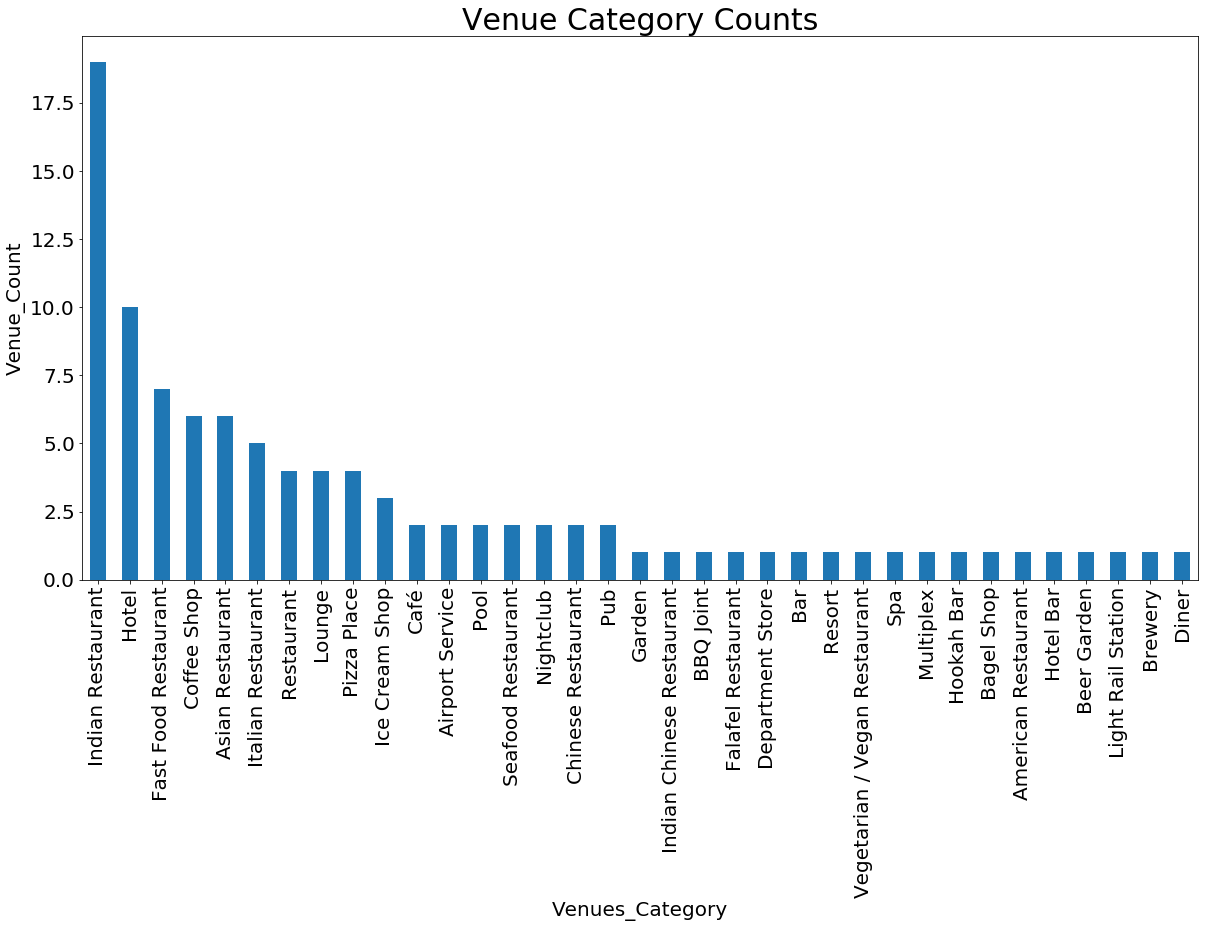

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

nearby_venues["categories"].value_counts().plot(kind='bar', figsize=(20,10), fontsize=20)
plt.title('Venue Category Counts', fontsize=30)
plt.xlabel('Venues_Category',fontsize=20)
plt.ylabel('Venue_Count', fontsize=20)

### We can see there are numerous other facilities near by like Restaurants, Departmental Stores, Multiplex etc , which makes this a sensible location to reside.

## Results and Discussion <a name="results"></a>

The Mumbai Postcode data in conjunction with the Foursquare and Rental rates data provided a base for a comprehensive analysis in order to determine a optimal location for settling down for a family.

Geospatial Map and Bar chart plot provided easily understandable and useful information to quickly and easily identify potential locations and assist in making an informed decision.

## Conclusion <a name="conclusion"></a>

The above analysis was not of an investigative nature and nor was there any "pattern identification" intention.
Purpose was to assist an individual and his family to relocate to a new city using data which is publicly available.

From the above analysis we can conclude that any real world problem can be resolved if we have right quantity and quality of data and adopting a creative approach to solve the problem.